## **Aim of this Project**

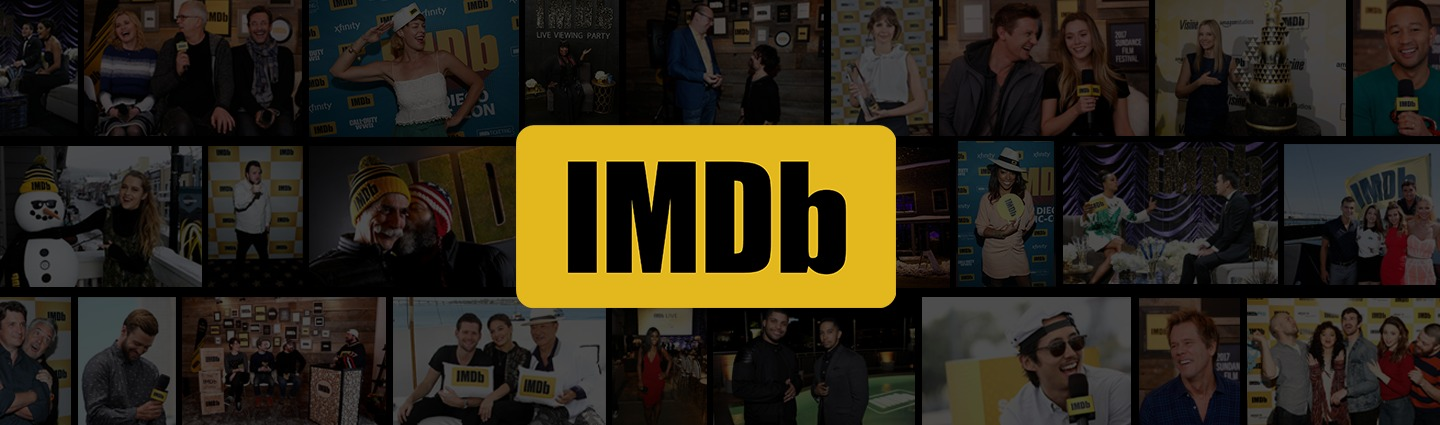
- The aim of the Sentiment Analysis of IMDB Reviews Project is to develop a machine learning model that can accurately determine the sentiment expressed in movie reviews.
- By analyzing the text of reviews available on the IMDB database, the model should classify each review as either positive or, negative providing valuable insights into audience perceptions and preferences.



## **About the Dataset**
---
- The IMDB dataset consists of 50,000 movie reviews, which serves as a substantial resource for natural language processing or text analytics tasks.
- This dataset is specifically curated for binary sentiment classification, offering a significant amount of data compared to previous benchmark datasets.
- It includes 25,000 highly polarized movie reviews for training purposes and another 25,000 reviews for testing.
- The objective is to use classification or deep learning algorithms to accurately predict the sentiment of the reviews, categorizing them as either positive or negative.

[IMDB Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)




## **Installing Packages**

In [ ]:
!python3.11 -m pip install --upgrade pip

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1


In [ ]:
# Core data handling and visualization libraries
!pip install numpy pandas seaborn matplotlib

# Natural Language Toolkit (NLTK)
!pip install nltk

# Machine Learning tools from scikit-learn
!pip install scikit-learn

# WordCloud for text visualization
!pip install wordcloud

# Beautiful Soup for HTML parsing
!pip install beautifulsoup4

# Spacy for advanced NLP
!pip install spacy

# TextBlob for easier text processing and sentiment analysis
!pip install textblob

# Downloading the required NLTK data
!python -m nltk.downloader all

# For Spacy's English models
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.0 MB/s eta 0:00:00a 0:00:01
/Users/anusreemohanan/.pyenv/versions/3.9.1/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/anusreemohanan/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/anusreemohanan/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/anusreemohanan/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package av

## **Importing Packages**

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
#Importing the dataset
data= pd.read_csv('/content/sample_data/IMDB Dataset.csv')

## **Preliminary Analysis and Data Cleaning**

In [4]:
print(data.shape)

(50000, 2)


In [ ]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
#Count of sentiments
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
# Data cleaning functions
def clean_text(text):
    # Removing HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Removing the square brackets
    text = re.sub('\[[^]]*\]', '', text)
    # Removing special characters
    text = re.sub(r'[^a-zA-z0-9\s]', '', text)
    return text

In [6]:
# Applying cleaning functions
data['review'] = data['review'].apply(clean_text)

<ipython-input-5-f7769860b29b>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


## **Preparation and Preprocessing**


---



1. **Tokenizer Initialization**:
   - Utilizes `ToktokTokenizer` to split text into individual elements (tokens), which includes both words and punctuation marks.

2. **Stopword List**:
   - Retrieves a predefined list of English stopwords from the NLTK library. Stopwords are frequently occurring words that usually don't carry significant meaning (e.g., "and", "the", "is").

3. **Stopword Removal Function**:
   - **Definition**: Creates a function `remove_stopwords` that processes text by removing stopwords.
   - **Tokenization**: Breaks down each text input into tokens.
   - **Filtering**: Removes tokens that are identified as stopwords, ensuring case insensitivity by converting all tokens to lowercase before comparison.
   - **Reconstruction**: Combines the remaining tokens back into a single string, separated by spaces.

4. **Application to Data**:
   - Applies the `remove_stopwords` function to every entry in the 'review' column of the DataFrame, effectively cleaning the text data by eliminating unnecessary words.

5. **Purpose**:
   - Enhances data quality for further processing and analysis in natural language processing tasks by focusing on more meaningful words, thereby improving the efficiency and performance of downstream models like sentiment analysis or feature extraction.



In [7]:
!pip install nltk

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# Tokenization and Stopword Removal
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

In [10]:
#Applying Stopword Removal to Data
def remove_stopwords(text):
    tokens = tokenizer.tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stopword_list]
    return ' '.join(tokens)

data['review'] = data['review'].apply(remove_stopwords)

## **Data Preparation for Model Training**










In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Splitting the Dataset into Training and Testing Sets
train_reviews, test_reviews, train_sentiments, test_sentiments = train_test_split(
    data['review'], data['sentiment'], test_size=0.2, random_state=42)

In [13]:
# Sentiment Label Binarization
lb = LabelBinarizer()
train_sentiments = lb.fit_transform(train_sentiments)
test_sentiments = lb.transform(test_sentiments)

- **Sentiment Label Binarization**:
  - **Purpose**: To convert sentiment labels from a categorical format (e.g., 'positive', 'negative') into a binary format, which is often required for modeling processes.

  - **Result**: Sentiment labels are converted into a format suitable for training machine learning models, ensuring that both training and testing data are consistently formatted.

## **Feature Extraction and Model Training**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer Initialization and Transformation
tv = TfidfVectorizer(min_df=0.01, max_df=0.95, ngram_range=(1, 2))
tv_train_reviews = tv.fit_transform(train_reviews)
tv_test_reviews = tv.transform(test_reviews)

# Logistic Regression Classifier Initialization and Training
log_reg = LogisticRegression(random_state=42, n_jobs=-1)
log_reg.fit(tv_train_reviews, train_sentiments.ravel())

LogisticRegression(n_jobs=-1, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF Vectorizer Initialization and Transformation
tv = TfidfVectorizer(min_df=0.01, max_df=0.95, ngram_range=(1,2))
tv_train_reviews = tv.fit_transform(train_reviews)
tv_test_reviews = tv.transform(test_reviews)

#Random Forest Classifier Initialization and Training
rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf.fit(tv_train_reviews, train_sentiments.ravel())


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

## **Model Evaluation**

In [17]:
from sklearn.metrics import accuracy_score, classification_report

# Making Predictions with the Trained Logistic Regression Model
log_reg_predictions = log_reg.predict(tv_test_reviews)

# Calculating Logistic Regression Model Accuracy
log_reg_accuracy = accuracy_score(test_sentiments, log_reg_predictions)
print("Logistic Regression Model Accuracy:", log_reg_accuracy)

# Displaying a Classification Report for Logistic Regression Model
print(classification_report(test_sentiments, log_reg_predictions, target_names=['Positive', 'Negative']))


Logistic Regression Model Accuracy: 0.8772
              precision    recall  f1-score   support

    Positive       0.88      0.86      0.87      4961
    Negative       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [15]:
# Making Predictions with the Trained Model metrics
rf_predictions = rf.predict(tv_test_reviews)
rf_accuracy = accuracy_score(test_sentiments, rf_predictions)
print("Random Forest Model Accuracy:", rf_accuracy)
print(classification_report(test_sentiments, rf_predictions, target_names=['Positive', 'Negative']))


Random Forest Model Accuracy: 0.8337
              precision    recall  f1-score   support

    Positive       0.82      0.84      0.83      4961
    Negative       0.84      0.82      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



- **Logistic Regression Model Performance**:
  - **Accuracy**: 87.72%, indicating a high overall effectiveness.
  - **Precision**: Approximately 0.88 for both positive and negative reviews, demonstrating good predictability.
  - **Recall**: Around 0.86 for positive reviews and 0.89 for negative reviews, showing strong sensitivity.
  - **F1-Score**: Balanced f1-scores of 0.87 and 0.88 for positive and negative reviews respectively, suggesting well-rounded precision and recall.

- **Random Forest Model Performance**:
  - **Accuracy**: 83.37%, slightly lower than the Logistic Regression model.
  - **Precision**: 0.82 for positive reviews and 0.84 for negative reviews.
  - **Recall**: Approximately 0.84 for positive reviews and 0.82 for negative reviews, indicating a small trade-off between classifying positive and negative sentiments.
  - **F1-Score**: Consistent f1-scores of 0.83 for both review types, reflecting a balance but slightly less optimal than Logistic Regression.

- **Comparative Analysis**:
  - The Logistic Regression model has a slight edge over the Random Forest model in terms of accuracy and f1-scores, reflecting better performance in classifying both positive and negative movie reviews.
  - Both models show effective sentiment classification capabilities, but Logistic Regression appears more consistent in this scenario.


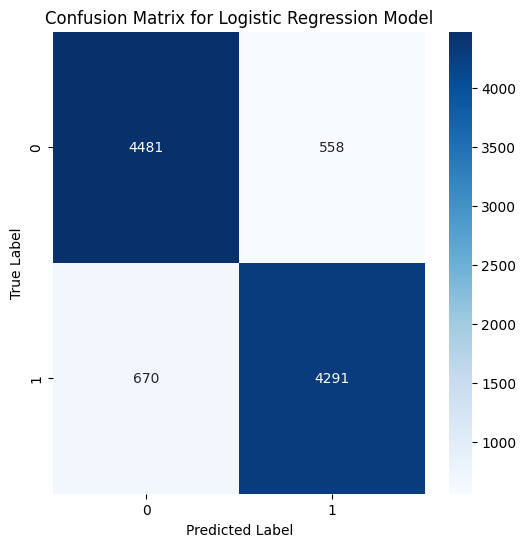

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming log_reg_predictions are obtained from Logistic Regression model
# Ensure to adjust 'log_reg_predictions' to match your variable names if different

# Calculating the Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(test_sentiments, log_reg_predictions, labels=[1, 0])

# Visualization of Confusion Matrix using Seaborn Heatmap
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

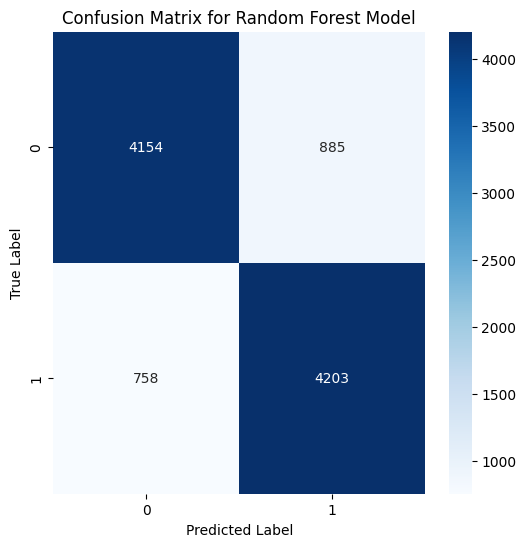

In [ ]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(test_sentiments, rf_predictions, labels=[1,0])
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## **Insights Extraction and Visualization**

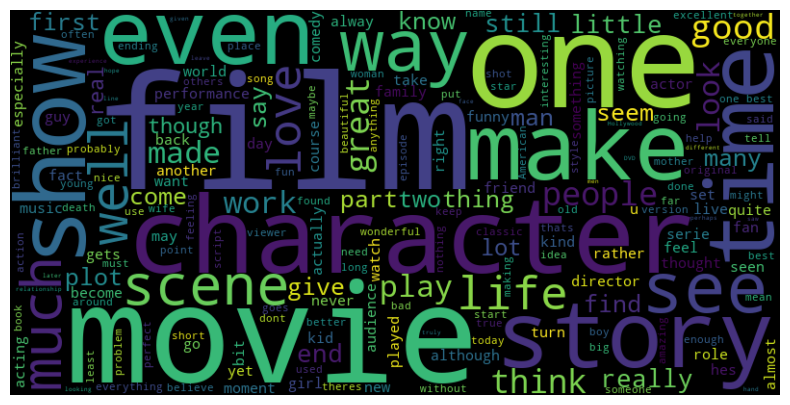

In [ ]:
# Aggregating Positive Reviews for Word Cloud
positive_reviews = data[data['sentiment'] == 'positive']['review']
positive_text = " ".join(review for review in positive_reviews)
wordcloud = WordCloud(width=800, height=400).generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

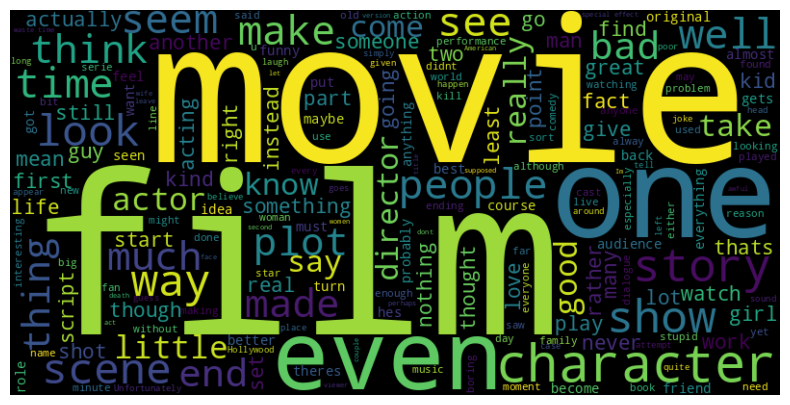

In [20]:
# Aggregating Negative Reviews for Word Cloud
negative_reviews = data[data['sentiment'] == 'negative']['review']
negative_text = " ".join(review for review in negative_reviews)
wordcloud = WordCloud(width=800, height=400).generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Model and Vectorizer Persistence**

In [ ]:
import joblib

# Save the model and TF-IDF vectorizer
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(tv, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [21]:
import joblib

# Save the Logistic Regression model
joblib.dump(log_reg, 'logistic_regression_model.pkl')

# Save the TF-IDF Vectorizer
joblib.dump(tv, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

## **References**


---
- https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
- https://www.geeksforgeeks.org/create-a-simple-sentiment-analysis-webapp-using-streamlit/
- https://ai.stanford.edu/~amaas/data/sentiment/
- https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews
- https://help.yext.com/hc/en-us/articles/360000280186-Create-a-Collection-for-Review-Sentiment-Analysis
- https://openai.com/gpt-4
- https://streamlit.io/

## **License**

MIT License

Copyright (c) 2024 Anusree Mohanan

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.